In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

In [2]:
face = sp.misc.imread('data/man.png', flatten=True)

In [3]:
V, D, U = np.linalg.svd(face, full_matrices=False)

In [4]:
V.shape, D.shape, U.shape

((360, 360), (360,), (360, 480))

In [5]:
V @ np.diag(D) @ U

array([[ 129.44189453,  129.44189453,  129.44194031, ...,  199.94293213,
         199.94308472,  199.94299316],
       [ 129.44200134,  129.44210815,  129.44190979, ...,  199.94300842,
         199.94303894,  199.94291687],
       [ 129.44206238,  129.44190979,  129.44210815, ...,  199.94290161,
         199.94308472,  199.94297791],
       ..., 
       [  88.87003326,   88.87003326,   89.87006378, ...,   19.89800835,
          21.19701385,   23.19702148],
       [  88.87004089,   88.86997223,   88.87001801, ...,   30.89799118,
          28.19699287,   28.19700623],
       [  88.86994934,   88.87001038,   88.87008667, ...,   44.89804459,
          34.19699478,   28.19698334]], dtype=float32)

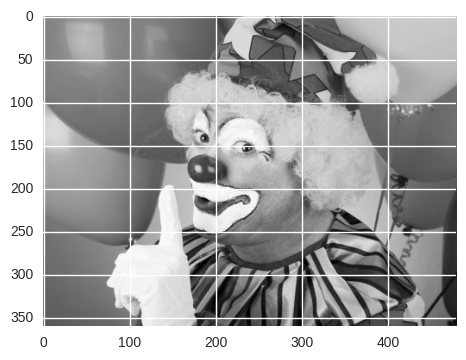

In [6]:
plt.imshow(face, cmap=plt.cm.gray)

In [7]:
k = 7


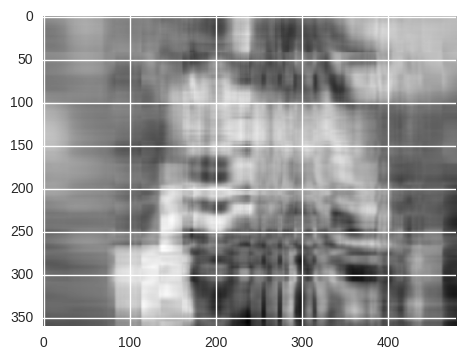

In [8]:
plt.imshow(V[:,:k] @ np.diag(D[:k]) @ U[:k, :], cmap=plt.cm.gray)

In [9]:
import sklearn.neighbors
from sklearn.decomposition import PCA

In [10]:
faces = np.load('data/faces.npy')

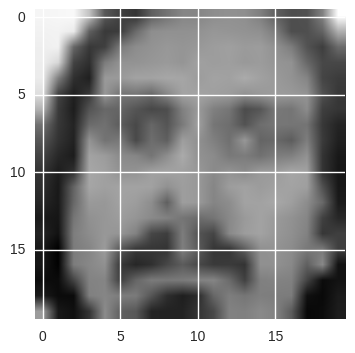

In [11]:
plt.imshow(faces[0].reshape((20, 20)), cmap=plt.cm.gray)

In [12]:
pca = PCA(n_components=40)

In [13]:
pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
new_faces = pca.transform(faces)

In [15]:
new_faces.shape

(8832, 40)

In [16]:
kde = sklearn.neighbors.KernelDensity()

In [17]:
kde.fit(new_faces)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

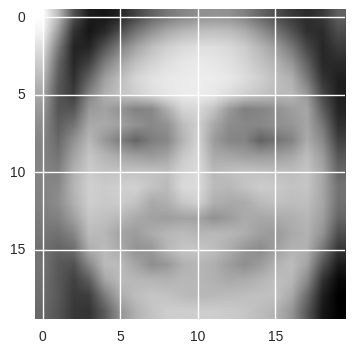

In [21]:
s = kde.sample()
new_face = pca.inverse_transform(s)
plt.imshow(new_face.reshape((20, 20)), cmap=plt.cm.gray)